# #Wiggly Cam

In [3]:
import sys, os
from time import sleep, time
import numpy as np
codebase_dir = 'D:/ZiaLab/Codebase/'
sys.path.append(codebase_dir)
%reload_ext autoreload
%autoreload 2
%load_ext autotime
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from zialab.instruments.pipython import GCSDevice
from zialab.instruments.pipython import pitools
import cv2 as cv
from zialab.misc.sugar import bell
from zialab.softwarecontrol import spe2py

time: 625 ms (started: 2023-05-03 08:14:39 -04:00)


In [28]:
from zialab.softwarecontrol.spe_loader import load_from_files

time: 0 ns (started: 2023-05-03 08:31:44 -04:00)


## ##Functions

In [85]:
def move_and_wait(stage, axis, position):
    '''
    Move to the commanded position and wait until it's reached.
    Parameters
    ----------
    axis  (str): 'x' or 'y'
    position (float): position in mm
    Returns
    -------
    None
    '''
    AXES_RANGE = 40.
    assert axis in ['x','y']
    axis = {'x':'1','y':'2'}[axis]
    assert type(position) in [int,float,np.float64, np.float32, np.int32, np.int64], "wacky position"
    assert abs(position) < AXES_RANGE, "position out of range"
    stage.MOV(axis,position)
    while not stage.qONT()[axis]:
        sleep(0.01)
    return None

time: 0 ns (started: 2023-05-03 09:48:37 -04:00)


## ##Initialize Instruments

### ###Stage

In [92]:
# run this only once
stage = GCSDevice('C-867')
stage.InterfaceSetupDlg()
stage.qIDN()
# turn on the servo motors
stage.SVO('2',True)
stage.SVO('1',True)
# configure data tables
stage.DRC(1, '1', 44) # time stamps in ms
stage.DRC(2, '1', 1) # motor output
stage.DRC(3, '1', 2) # commanded position
stage.DRC(4, '1', 73) # actual position
stage.RTR(2) # this trigger rate is adequate for the speeds and lenghts i often care about


time: 4.16 s (started: 2023-05-03 10:45:18 -04:00)


In [6]:
# stage.close()

time: 125 ms (started: 2023-03-29 13:30:01 -04:00)


In [93]:
# set the speed of both axes
vel = 0.1
stage.VEL(1,vel)
stage.VEL(2,vel)

time: 31 ms (started: 2023-05-03 10:45:28 -04:00)


In [94]:
# querying the speed of both axes
print('V_x = %f mm/s' % stage.qVEL(1)[1])
print('V_y = %f mm/s' % stage.qVEL(2)[2])

V_x = 0.100000 mm/s
V_y = 0.100000 mm/s
time: 78 ms (started: 2023-05-03 10:45:29 -04:00)


In [22]:
# here's an example of moving the stage to x=1mm, y=1mm
move_and_wait(stage, 'x', 1)
move_and_wait(stage, 'y', 1)

time: 1min 40s (started: 2023-03-15 13:17:03 -04:00)


In [9]:
stage.qPOS(1)


OrderedDict([(1, -0.1878)])

time: 31 ms (started: 2023-03-29 13:39:11 -04:00)


In [10]:
stage.qPOS(2)

OrderedDict([(2, 1.1199)])

time: 31 ms (started: 2023-03-29 13:39:49 -04:00)


### ###Lightfield Instance

In [137]:
from zialab.softwarecontrol import lightfield
# from zialab.softwarecontrol import spe2py
lf = lightfield.LField()
lf_dir = lf.lf_dir
lf.pref_naming_settings()

time: 16.7 s (started: 2023-05-03 11:52:53 -04:00)


In [138]:
# this enforces a naming convention where every filename needs
# to be defined intentionally, none of that Automatic for us
lf.pref_naming_settings()

time: 0 ns (started: 2023-05-03 11:53:45 -04:00)


In [140]:
# given in ms
lf.set_exposure(100)

time: 31 ms (started: 2023-05-03 11:54:24 -04:00)


In [87]:
# this is how the filename is set
# by itself it also adds a timetag to the filename
lf.set_filename('wed-testing')

time: 0 ns (started: 2023-03-15 13:54:50 -04:00)


In [34]:
# useful to get the latest filename that was created in the directory
# where lightfield is saving its data
spe = lightfield.get_latest_spe_fname(lf_dir)

time: 0 ns (started: 2023-03-15 13:36:10 -04:00)


In [88]:
# here's one example were we load a tif file that was
# created together with an spe
the_tiff_fname = os.path.join(spe['dir'],spe['fname'].replace('.spe','.tif'))

time: 0 ns (started: 2023-03-15 13:56:03 -04:00)


In [75]:
# this loads the image data as a numpy array
img = cv.imread(the_tiff_fname, cv.IMREAD_GRAYSCALE)

time: 0 ns (started: 2023-03-15 13:50:50 -04:00)


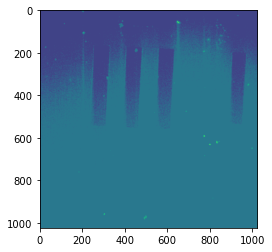

time: 234 ms (started: 2023-03-15 13:52:46 -04:00)


In [86]:
# here's a simple view of the data that the array contains
plt.imshow(img)

In [6]:
# Test of stage and camera 

#Step 1: Move stage to position x: -0.188 y: 0.22
move_and_wait(stage, 'x', -0.188)
move_and_wait(stage, 'y', 0.22)


time: 19.8 s (started: 2023-03-15 14:10:41 -04:00)


In [7]:
# Step 2: Change Exposure Time to 1 second
lf.set_exposure(1000)

time: 15 ms (started: 2023-03-15 14:11:35 -04:00)


In [8]:
#Step 2.5 - Name the image 
lf.set_filename('gabby_test_3_15')

time: 16 ms (started: 2023-03-15 14:13:49 -04:00)


In [9]:
#Step 3: Acquire an image

lf.acquire_and_wait()

time: 2.61 s (started: 2023-03-15 14:15:38 -04:00)


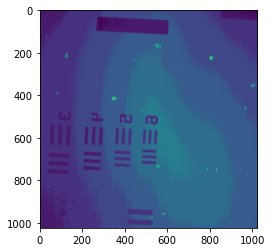

time: 328 ms (started: 2023-03-15 14:19:06 -04:00)


In [10]:
#Step 4: Load the TIF File and Plot Data  
spe = lightfield.get_latest_spe_fname(lf_dir)
the_tiff_fname = os.path.join(spe['dir'],spe['fname'].replace('.spe','.tif'))
img = cv.imread(the_tiff_fname, cv.IMREAD_GRAYSCALE)
plt.imshow(img)




## ##Random Walks

### ###Necessary functions

In [4]:
from random import choice

time: 0 ns (started: 2023-05-03 08:14:44 -04:00)


In [5]:
def rando_wiggle(step_size_in_um, xy_origin_in_mm, num_steps):
    '''
    Parameters
    ----------
    step_size_in_um (float)
    xy_origin_in_mm (tuple) (x0, y0)
    num_steps       (int) : how many regions the random walk has
    Returns
    -------
    walkSteps (np.array), walkString (str), walkTrajectory (np.array)
        walkSteps : has the incremental motions in units of the step size
        walkString : is a string representation of the incremental motions
        walkTrajectory : each row of this array represents the different positions (in mm) that the walk should visit
    '''
    step_size_in_mm = step_size_in_um/1000
    step_choices = [(1,0),(-1,0),(0,1),(0,-1)]
    walkSteps = [(0,0)]
    walkString = 'O'
    for i in range(num_steps-1):
        rando_move = choice(step_choices)
        if rando_move == (1,0):
            walkString+= 'R'
        elif rando_move == (0,1):
            walkString += 'U'
        elif rando_move == (0,-1):
            walkString += 'D'
        elif rando_move ==  (-1,0):
            walkString += 'L'
        walkSteps.append(rando_move)
    walkSteps = np.array(walkSteps)
    walkTrajectory_in_mm = step_size_in_mm*np.cumsum(walkSteps,axis=0)
    walkTrajectory_in_mm = np.array(xy_origin_in_mm) + walkTrajectory_in_mm
    walkTrajectory_in_steps = np.cumsum(walkSteps,axis=0)
    return walkSteps, walkString, walkTrajectory_in_mm, walkTrajectory_in_steps


time: 0 ns (started: 2023-05-03 08:14:44 -04:00)


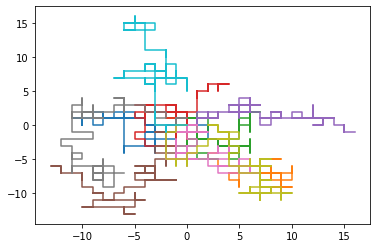

time: 140 ms (started: 2023-03-29 14:07:20 -04:00)


In [52]:
plt.figure()
for trajectory in experiment['walk_trajectories_in_int']:
    plt.plot(trajectory[:,0], trajectory[:,1])
plt.show()

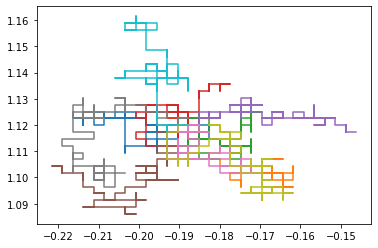

time: 188 ms (started: 2023-03-29 14:07:20 -04:00)


In [53]:
plt.figure()
for trajectory in experiment['walk_trajectories_in_mm']:
    plt.plot(trajectory[:,0], trajectory[:,1])
plt.show()

### ###Random Walks - March 29th

In [90]:
experiment = {'num_random_walks': 10,
              'step_size_in_um': 2.6 ,
              'xy_origin_in_mm': (-0.1878, 1.1199),
              'num_steps': 100,
              'data': [],
              'walk_steps': [],
              'walk_strings': [],
              'walk_trajectories_in_int': [],
              'walk_trajectories_in_mm': []}
for i in range(experiment['num_random_walks']):
    walkSteps, walkString, walkTrajectory_in_mm, walkTrajectory_in_steps = rando_wiggle(experiment['step_size_in_um'],
                                                         experiment['xy_origin_in_mm'],
                                                         experiment['num_steps'])
    experiment['walk_steps'].append(walkSteps)
    experiment['walk_strings'].append(walkString)
    experiment['walk_trajectories_in_mm'].append(walkTrajectory_in_mm)
    experiment['walk_trajectories_in_int'].append(walkTrajectory_in_steps)

time: 0 ns (started: 2023-03-29 14:49:15 -04:00)


In [91]:
trajectories_in_mm = experiment['walk_trajectories_in_mm']
trajectories_in_int = experiment['walk_trajectories_in_int']
for rando_walk_index in range(experiment['num_random_walks']):
    single_walk_dictionary = {}
    trajectory_in_mm = trajectories_in_mm[rando_walk_index]
    trajectory_in_int = trajectories_in_int[rando_walk_index]
    for trajectory_index in range(experiment['num_steps']):
        commanded_position_in_mm = trajectory_in_mm[trajectory_index]
        commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
        # command the stage to move to commanded_position_in_mm
        x, y = commanded_position_in_mm
        move_and_wait(stage,'x',x)
        move_and_wait(stage,'y',y)
        # tell lightfield to set the filename to blah
        fname = 'rando_wiggle-%d-%d' % (rando_walk_index, trajectory_index)
        lf.set_filename(fname)
        # take an exposure
        lf.acquire_and_wait()
        # grab the actual name of spe file
        spe_fname = lightfield.get_latest_spe_fname(lf_dir)
        the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
        # create the name of the tiff file
        single_walk_dictionary[trajectory_index] = the_tiff_fname
    experiment['data'].append(single_walk_dictionary)

time: 21min 44s (started: 2023-03-29 14:49:19 -04:00)


In [2]:
import pickle

In [93]:
# pickle.dump(experiment, open('rando-walks-wigglycam.pkl','wb'))

time: 15 ms (started: 2023-03-29 15:31:14 -04:00)


In [4]:
# pickle.load(open('rando-walks-wigglycam.pkl','rb'))

In [96]:
imgdir = 'C:/Users/glitteri/Desktop/rando_walks'

time: 0 ns (started: 2023-03-29 15:33:03 -04:00)


In [113]:
for fname in [f for f in os.listdir(imgdir) if f.endswith('.tif') and 'rando' in f]:
    fullFname = os.path.join(imgdir,fname)
    newName = [None,None,None]
    newName = fname.split('-')
    newName = ('-'.join(newName[:3]))+'.tif'
    newName = os.path.join(imgdir,newName)
    os.rename(fullFname, newName)

time: 1.44 s (started: 2023-03-29 15:37:21 -04:00)


In [121]:
lines = []
for idx in range(10):
    bigs = ','.join(list(map(str,list(experiment['walk_trajectories_in_int'][idx]))))
    lines.append(bigs)

time: 63 ms (started: 2023-03-29 15:42:25 -04:00)


In [126]:
with open('recorded_trajectories.txt','w') as file:
    for line in lines:
        file.write(line+'\n')

time: 0 ns (started: 2023-03-29 15:43:21 -04:00)


In [127]:
stage.close()

time: 140 ms (started: 2023-03-29 16:04:16 -04:00)


### ###Random Walks - March 30th 

In [ ]:
from tqdm import tqdm

time: 0 ns (started: 2023-03-30 13:27:41 -04:00)


In [19]:
experiment = {'num_random_walks': 2,
              'step_size_in_um': 2.6 ,
              'xy_origin_in_mm': (-0.1878, 1.1199),
              'num_steps': 500,
              'data': [],
              'walk_steps': [],
              'walk_strings': [],
              'walk_trajectories_in_int': [],
              'walk_trajectories_in_mm': []}
for i in range(experiment['num_random_walks']):
    walkSteps, walkString, walkTrajectory_in_mm, walkTrajectory_in_steps = rando_wiggle(experiment['step_size_in_um'],
                                                         experiment['xy_origin_in_mm'],
                                                         experiment['num_steps'])
    experiment['walk_steps'].append(walkSteps)
    experiment['walk_strings'].append(walkString)
    experiment['walk_trajectories_in_mm'].append(walkTrajectory_in_mm)
    experiment['walk_trajectories_in_int'].append(walkTrajectory_in_steps)

time: 0 ns (started: 2023-03-30 13:28:05 -04:00)


In [20]:
trajectories_in_mm = experiment['walk_trajectories_in_mm']
trajectories_in_int = experiment['walk_trajectories_in_int']
for rando_walk_index in range(experiment['num_random_walks']):
    single_walk_dictionary = {}
    trajectory_in_mm = trajectories_in_mm[rando_walk_index]
    trajectory_in_int = trajectories_in_int[rando_walk_index]
    for trajectory_index in tqdm(range(experiment['num_steps'])):
        commanded_position_in_mm = trajectory_in_mm[trajectory_index]
        commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
        # command the stage to move to commanded_position_in_mm
        x, y = commanded_position_in_mm
        move_and_wait(stage,'x',x)
        move_and_wait(stage,'y',y)
        # tell lightfield to set the filename to blah
        fname = 'rando_wiggle-%d-%d' % (rando_walk_index, trajectory_index)
        lf.set_filename(fname,timetag=False)
        # take an exposure
        lf.acquire_and_wait()
        # grab the actual name of spe file
        spe_fname = lightfield.get_latest_spe_fname(lf_dir)
        the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
        # create the name of the tiff file
        single_walk_dictionary[trajectory_index] = the_tiff_fname
    experiment['data'].append(single_walk_dictionary)
    bell()

100%|██████████| 500/500 [10:50<00:00,  1.30s/it]

time: 22min 28s (started: 2023-03-30 13:28:06 -04:00)


In [34]:
pickle.dump(experiment, open('rando500-wigglycam.pkl','wb'))

time: 0 ns (started: 2023-03-30 14:30:47 -04:00)


In [ ]:
# pickle.load(open('rando-walks-wigglycam.pkl','rb'))

In [ ]:
imgdir = 'C:/Users/glitteri/Desktop/rando_walks'

time: 0 ns (started: 2023-03-29 15:33:03 -04:00)


In [ ]:
for fname in [f for f in os.listdir(imgdir) if f.endswith('.tif') and 'rando' in f]:
    fullFname = os.path.join(imgdir,fname)
    newName = [None,None,None]
    newName = fname.split('-')
    newName = ('-'.join(newName[:3]))+'.tif'
    newName = os.path.join(imgdir,newName)
    os.rename(fullFname, newName)

time: 1.44 s (started: 2023-03-29 15:37:21 -04:00)


In [ ]:
lines = []
for idx in range(10):
    bigs = ','.join(list(map(str,list(experiment['walk_trajectories_in_int'][idx]))))
    lines.append(bigs)

time: 63 ms (started: 2023-03-29 15:42:25 -04:00)


In [ ]:
with open('recorded_trajectories.txt','w') as file:
    for line in lines:
        file.write(line+'\n')

time: 0 ns (started: 2023-03-29 15:43:21 -04:00)


In [ ]:
stage.close()

time: 140 ms (started: 2023-03-29 16:04:16 -04:00)


[[[0, 0],
  [1, 0],
  [1, -1],
  [2, -1],
  [2, -2],
  [2, -1],
  [1, -1],
  [0, -1],
  [0, -2],
  [1, -2],
  [1, -1],
  [2, -1],
  [3, -1],
  [3, -2],
  [4, -2],
  [3, -2],
  [3, -1],
  [2, -1],
  [3, -1],
  [3, 0],
  [2, 0],
  [1, 0],
  [2, 0],
  [3, 0],
  [2, 0],
  [1, 0],
  [0, 0],
  [0, 1],
  [-1, 1],
  [-1, 2],
  [-1, 3],
  [-2, 3],
  [-2, 4],
  [-1, 4],
  [-1, 3],
  [0, 3],
  [-1, 3],
  [-1, 2],
  [-1, 1],
  [-1, 0],
  [-2, 0],
  [-2, -1],
  [-2, 0],
  [-2, -1],
  [-3, -1],
  [-2, -1],
  [-3, -1],
  [-3, -2],
  [-3, -1],
  [-3, 0],
  [-3, -1],
  [-2, -1],
  [-1, -1],
  [-1, -2],
  [-2, -2],
  [-1, -2],
  [-1, -3],
  [0, -3],
  [1, -3],
  [1, -4],
  [1, -5],
  [1, -6],
  [0, -6],
  [1, -6],
  [2, -6],
  [2, -5],
  [1, -5],
  [1, -4],
  [1, -5],
  [1, -4],
  [1, -3],
  [2, -3],
  [2, -2],
  [1, -2],
  [1, -1],
  [2, -1],
  [3, -1],
  [2, -1],
  [3, -1],
  [3, 0],
  [4, 0],
  [3, 0],
  [3, -1],
  [3, 0],
  [3, 1],
  [3, 2],
  [2, 2],
  [2, 1],
  [1, 1],
  [1, 2],
  [1, 3],
  [1, 4]

time: 47 ms (started: 2023-03-30 13:59:43 -04:00)


In [27]:
with open('rando_500_trajectories.py','w') as file:
    file.write('rando500='+str(list(map(lambda x: x.tolist(), np.array(experiment['walk_trajectories_in_int'])))))

time: 15 ms (started: 2023-03-30 14:00:00 -04:00)


In [29]:
from rando_500_trajectories import rando500

time: 15 ms (started: 2023-03-30 14:03:31 -04:00)


### ###Loading spe files (example)

In [41]:
filedir, fname = ('C:/Users/glitteri/Documents/LightField','rando_wiggle-1-498.spe')

time: 0 ns (started: 2023-05-03 08:40:57 -04:00)


In [44]:
full_fname = os.path.join(filedir,fname)
spe_data = spe2py.SpeFile(full_fname)

XML Footer was not loaded prior to calling _get_wavelength
time: 15 ms (started: 2023-05-03 08:44:30 -04:00)


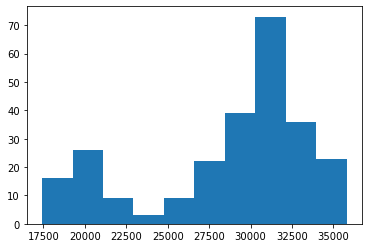

time: 172 ms (started: 2023-05-03 08:47:53 -04:00)


In [55]:
data = (spe_data.data[0][0])
plt.figure()
plt.hist(data.flatten())
plt.show()

In [59]:
data.shape

(16, 16)

time: 0 ns (started: 2023-05-03 08:51:11 -04:00)


In [63]:
big_data = np.zeros((500,16,16))
filedir = 'C:/Users/glitteri/Documents/LightField'
for i in range(500):
    fname = (f'rando_wiggle-1-{i}.spe')
    full_fname = os.path.join(filedir,fname)
    spe_data = spe2py.SpeFile(full_fname, skip_wavelength=True)
    data = (spe_data.data[0][0])
    big_data[i] = data

time: 1.17 s (started: 2023-05-03 08:54:08 -04:00)


In [77]:
from zialab.misc.top_eclipse import nikoncalibrator

time: 0 ns (started: 2023-05-03 09:08:00 -04:00)


In [84]:
single_exposure_time = 0.200
time_taken =  10
nikon_knob = 50
max_counts = 60000
max_count = np.max(big_data)
est_max_count = 0.0000001 * (max_count/single_exposure_time) * time_taken
new_knob = nikoncalibrator(est_max_count, nikon_knob, max_counts)
print(f"Estimated max counts on long exposure is {est_max_count}.")
print(f"Change the illumination knob to {new_knob}.")
input("Press Enter to continue.")

AssertionError: Target intensity is too high, maximum is about 1. Consider increasing the overall brightness by other means.

time: 15 ms (started: 2023-05-03 09:31:33 -04:00)


In [75]:
16*16

256

time: 0 ns (started: 2023-05-03 09:02:51 -04:00)


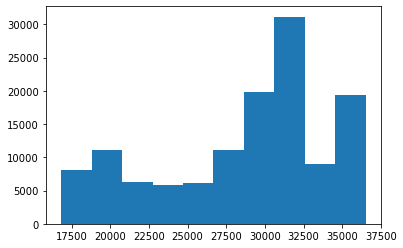

time: 219 ms (started: 2023-05-03 08:57:00 -04:00)


In [70]:
plt.figure()
plt.hist(big_data.flatten())
plt.show()

### ###Random Walk + Long Exposure - May 3 

In [1]:
from tqdm import tqdm

In [145]:
experiment = {'num_random_walks': 1,
              'step_size_in_um': 2.6 ,
              'xy_origin_in_mm': (0.5390, 1.1998),
              'condenser_aperture_diaphragm': 8,
              'num_steps': 200,
              'stepped_data': [],
              'long_exp_data': [],
              'walk_steps': [],
              'walk_strings': [],
              'single_exposure_time': 0.1,
              'walk_trajectories_in_int': [],
              'walk_trajectories_in_mm': []}
for i in range(experiment['num_random_walks']):
    walkSteps, walkString, walkTrajectory_in_mm, walkTrajectory_in_steps = rando_wiggle(experiment['step_size_in_um'],
                                                         experiment['xy_origin_in_mm'],
                                                         experiment['num_steps'])
    experiment['walk_steps'].append(walkSteps)
    experiment['walk_strings'].append(walkString)
    experiment['walk_trajectories_in_mm'].append(walkTrajectory_in_mm)
    experiment['walk_trajectories_in_int'].append(walkTrajectory_in_steps)

time: 0 ns (started: 2023-05-03 11:58:01 -04:00)


In [146]:
max_counts = 60000 # use to estimate correct exposure
trajectories_in_mm = experiment['walk_trajectories_in_mm']
trajectories_in_int = experiment['walk_trajectories_in_int']
num_steps = experiment['num_steps']
single_exposure_time = experiment['single_exposure_time']
xorigin, yorigin = experiment['xy_origin_in_mm']
nikon_knob = 50
for rando_walk_index in range(experiment['num_random_walks']):
    big_data = np.zeros((num_steps,16,16))
    single_walk_dictionary = {}
    trajectory_in_mm = trajectories_in_mm[rando_walk_index]
    trajectory_in_int = trajectories_in_int[rando_walk_index]
    move_and_wait(stage,'x',xorigin)
    move_and_wait(stage,'y',yorigin)
    lf.set_exposure(single_exposure_time*1000)
    time_taken = 0
    for trajectory_index in tqdm(range(experiment['num_steps'])):
        commanded_position_in_mm = trajectory_in_mm[trajectory_index]
        commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
        # command the stage to move to commanded_position_in_mm
        x, y = commanded_position_in_mm
        start_time = time()
        move_and_wait(stage,'x',x)
        move_and_wait(stage,'y',y)
        end_time = time()
        time_taken += (end_time-start_time)
        # tell lightfield to set the filename to blah
        fname = 'long_wiggle-%d-%d' % (rando_walk_index, trajectory_index)
        lf.set_filename(fname,timetag=False)
        # take an exposure
        lf.acquire_and_wait()
        # grab the actual name of spe file
        spe_fname = lightfield.get_latest_spe_fname(lf_dir)
        the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
        # create the name of the tiff file
        single_walk_dictionary[trajectory_index] = the_tiff_fname
        # read the data and save it to array
        full_fname = os.path.join(spe_fname['dir'], spe_fname['fname'])
        spe_data = spe2py.SpeFile(full_fname, skip_wavelength=True)
        data = (spe_data.data[0][0])
        big_data[trajectory_index] = data
    single_walk_dictionary['time_taken'] = time_taken
    # find the max count to estimate the max count rate
    max_count = np.max(big_data)
    single_walk_dictionary['big_data'] = big_data
    est_max_count = (max_count/single_exposure_time) * time_taken
    if rando_walk_index == 0:
        # this might fail on an assertion
        new_knob = nikoncalibrator(est_max_count, nikon_knob, max_counts)
        print(f"Estimated max counts on long exposure is {est_max_count}.")
        print(f"Change the illumination knob to {new_knob}.")
        # change illumination, if necessary
        input("Change illumination if necessary, press Enter to continue.")
    experiment['stepped_data'].append(single_walk_dictionary)
    # long exposure
    # move back to the origin
    move_and_wait(stage,'x',xorigin)
    move_and_wait(stage,'y',yorigin)
    # change the exposure to be equal to time_taken
    lf.set_exposure(time_taken*1000)
    fname = 'long_wiggle-%d-all' % (rando_walk_index)
    lf.set_filename(fname, timetag=False)
    lf.experiment.Acquire()
    start_time = time()
    for trajectory_index in tqdm(range(experiment['num_steps'])):
        commanded_position_in_mm = trajectory_in_mm[trajectory_index]
        commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
        # command the stage to move to commanded_position_in_mm
        x, y = commanded_position_in_mm
        move_and_wait(stage,'x',x)
        move_and_wait(stage,'y',y)
    end_time = time()
    time_actual_walk = end_time - start_time
    single_walk_dictionary['time_long_exp_actual'] = time_actual_walk
    # to be sure that the acquisition has actually ended
    extra_time = time_taken - time_actual_walk
    if extra_time > 0:
        sleep(extra_time*1.2)
    spe_fname = lightfield.get_latest_spe_fname(lf_dir)
    the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
    spe_data = spe2py.SpeFile(full_fname, skip_wavelength=True)
    long_exposure_data = (spe_data.data[0][0])
    experiment['long_exp_data'].append(long_exposure_data)
    bell()


100%|██████████| 200/200 [05:20<00:00,  1.60s/it]


Estimated max counts on long exposure is 6270645.100364685.
Change the illumination knob to 25.


100%|██████████| 200/200 [02:15<00:00,  1.48it/s]


time: 9min 4s (started: 2023-05-03 11:58:14 -04:00)


In [150]:
# time_actual_walk 135.43450045585632

135.43450045585632

time: 15 ms (started: 2023-05-03 12:13:08 -04:00)


In [151]:
# max_counts = 60000 # use to estimate correct exposure
# trajectories_in_mm = experiment['walk_trajectories_in_mm']
# trajectories_in_int = experiment['walk_trajectories_in_int']
# num_steps = experiment['num_steps']
# single_exposure_time = experiment['single_exposure_time']
# xorigin, yorigin = experiment['xy_origin_in_mm']
# nikon_knob = 50
# man_override = True
# for rando_walk_index in range(experiment['num_random_walks']):
#     big_data = np.zeros((num_steps,16,16))
#     single_walk_dictionary = {}
#     trajectory_in_mm = trajectories_in_mm[rando_walk_index]
#     trajectory_in_int = trajectories_in_int[rando_walk_index]
#     if not man_override:
#         move_and_wait(stage,'x',xorigin)
#         move_and_wait(stage,'y',yorigin)
#         lf.set_exposure(single_exposure_time*1000)
#         time_taken = 0
#         for trajectory_index in tqdm(range(experiment['num_steps'])):
#             commanded_position_in_mm = trajectory_in_mm[trajectory_index]
#             commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
#             # command the stage to move to commanded_position_in_mm
#             x, y = commanded_position_in_mm
#             start_time = time()
#             move_and_wait(stage,'x',x)
#             move_and_wait(stage,'y',y)
#             end_time = time()
#             time_taken += (end_time-start_time)
#             # tell lightfield to set the filename to blah
#             fname = 'long_wiggle-%d-%d' % (rando_walk_index, trajectory_index)
#             lf.set_filename(fname,timetag=False)
#             # take an exposure
#             lf.acquire_and_wait()
#             # grab the actual name of spe file
#             spe_fname = lightfield.get_latest_spe_fname(lf_dir)
#             the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
#             # create the name of the tiff file
#             single_walk_dictionary[trajectory_index] = the_tiff_fname
#             # read the data and save it to array
#             full_fname = os.path.join(spe_fname['dir'], spe_fname['fname'])
#             spe_data = spe2py.SpeFile(full_fname, skip_wavelength=True)
#             data = (spe_data.data[0][0])
#             big_data[trajectory_index] = data
#         single_walk_dictionary['time_taken'] = time_taken
#         # find the max count to estimate the max count rate
#         max_count = np.max(big_data)
#         single_walk_dictionary['big_data'] = big_data
#         est_max_count = (max_count/single_exposure_time) * time_taken
#         if rando_walk_index == 0:
#             # this might fail on an assertion
#             new_knob = nikoncalibrator(est_max_count, nikon_knob, max_counts)
#             print(f"Estimated max counts on long exposure is {est_max_count}.")
#             print(f"Change the illumination knob to {new_knob}.")
#             # change illumination, if necessary
#             input("Change illumination if necessary, press Enter to continue.")
#         experiment['stepped_data'].append(single_walk_dictionary)
#     else:
#         time_taken = 135.43450
#     # long exposure
#     # move back to the origin
#     move_and_wait(stage,'x',xorigin)
#     move_and_wait(stage,'y',yorigin)
#     # change the exposure to be equal to time_taken
#     lf.set_exposure(time_taken*1000)
#     fname = 'long_wiggle-%d-all-override' % (rando_walk_index)
#     lf.set_filename(fname, timetag=False)
#     lf.experiment.Acquire()
#     start_time = time()
#     for trajectory_index in tqdm(range(experiment['num_steps'])):
#         commanded_position_in_mm = trajectory_in_mm[trajectory_index]
#         commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
#         # command the stage to move to commanded_position_in_mm
#         x, y = commanded_position_in_mm
#         move_and_wait(stage,'x',x)
#         move_and_wait(stage,'y',y)
#     end_time = time()
#     time_actual_walk = end_time - start_time
#     single_walk_dictionary['time_long_exp_actual_override'] = time_actual_walk
#     # to be sure that the acquisition has actually ended
#     extra_time = time_taken - time_actual_walk
#     if extra_time > 0:
#         sleep(extra_time*1.2)
#     spe_fname = lightfield.get_latest_spe_fname(lf_dir)
#     the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
#     spe_data = spe2py.SpeFile(full_fname, skip_wavelength=True)
#     long_exposure_data = (spe_data.data[0][0])
#     experiment['long_exp_data'].append(long_exposure_data)
#     bell()


100%|██████████| 200/200 [02:32<00:00,  1.31it/s]

time: 2min 34s (started: 2023-05-03 12:15:58 -04:00)


### ###Random Walk + Long Exposure + Manual stop of motion - May 3 

In [ ]:
from tqdm import tqdm

In [176]:
experiment = {'num_random_walks': 1,
              'step_size_in_um': 2.6 ,
              'xy_origin_in_mm': (0.5390, 1.1998),
              'condenser_aperture_diaphragm': 8,
              'num_steps': 200,
              'stepped_data': [],
              'long_exp_data': [],
              'walk_steps': [],
              'walk_strings': [],
              'single_exposure_time': 0.1,
              'walk_trajectories_in_int': [],
              'walk_trajectories_in_mm': []}
for i in range(experiment['num_random_walks']):
    walkSteps, walkString, walkTrajectory_in_mm, walkTrajectory_in_steps = rando_wiggle(experiment['step_size_in_um'],
                                                         experiment['xy_origin_in_mm'],
                                                         experiment['num_steps'])
    experiment['walk_steps'].append(walkSteps)
    experiment['walk_strings'].append(walkString)
    experiment['walk_trajectories_in_mm'].append(walkTrajectory_in_mm)
    experiment['walk_trajectories_in_int'].append(walkTrajectory_in_steps)

time: 16 ms (started: 2023-05-03 12:49:28 -04:00)


In [177]:
max_counts = 60000 # use to estimate correct exposure
trajectories_in_mm = experiment['walk_trajectories_in_mm']
trajectories_in_int = experiment['walk_trajectories_in_int']
num_steps = experiment['num_steps']
single_exposure_time = experiment['single_exposure_time']
xorigin, yorigin = experiment['xy_origin_in_mm']
nikon_knob = 50
magical_chop = 0.35
for rando_walk_index in range(experiment['num_random_walks']):
    big_data = np.zeros((num_steps,16,16))
    single_walk_dictionary = {}
    trajectory_in_mm = trajectories_in_mm[rando_walk_index]
    trajectory_in_int = trajectories_in_int[rando_walk_index]
    move_and_wait(stage,'x',xorigin)
    move_and_wait(stage,'y',yorigin)
    lf.set_exposure(single_exposure_time*1000)
    time_taken = 0
    for trajectory_index in tqdm(range(experiment['num_steps'])):
        commanded_position_in_mm = trajectory_in_mm[trajectory_index]
        commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
        # command the stage to move to commanded_position_in_mm
        x, y = commanded_position_in_mm
        start_time = time()
        move_and_wait(stage,'x',x)
        move_and_wait(stage,'y',y)
        end_time = time()
        time_taken += (end_time-start_time)
        # tell lightfield to set the filename to blah
        fname = 'long_wiggle-%d-%d' % (rando_walk_index, trajectory_index)
        lf.set_filename(fname,timetag=False)
        # take an exposure
        lf.acquire_and_wait()
        # grab the actual name of spe file
        spe_fname = lightfield.get_latest_spe_fname(lf_dir)
        the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
        # create the name of the tiff file
        single_walk_dictionary[trajectory_index] = the_tiff_fname
        # read the data and save it to array
        full_fname = os.path.join(spe_fname['dir'], spe_fname['fname'])
        spe_data = spe2py.SpeFile(full_fname, skip_wavelength=True)
        data = (spe_data.data[0][0])
        big_data[trajectory_index] = data
    single_walk_dictionary['time_taken'] = time_taken
    # find the max count to estimate the max count rate
    max_count = np.max(big_data)
    single_walk_dictionary['big_data'] = big_data
    est_max_count = (max_count/single_exposure_time) * time_taken
    if rando_walk_index == 0:
        # this might fail on an assertion
        new_knob = nikoncalibrator(est_max_count, nikon_knob, max_counts)
        print(f"Estimated max counts on long exposure is {est_max_count}.")
        print(f"Change the illumination knob to {new_knob}.")
        # change illumination, if necessary
        input("Change illumination if necessary, press Enter to continue.")
    # long exposure
    # move back to the origin
    move_and_wait(stage,'x',xorigin)
    move_and_wait(stage,'y',yorigin)
    # change the exposure to be equal to time_taken
    time_taken = (1-magical_chop) * time_taken
    lf.set_exposure(time_taken*1000)
    fname = 'long_wiggle-%d-all' % (rando_walk_index)
    lf.set_filename(fname, timetag=False)
    lf.experiment.Acquire()
    start_time = time()
    for trajectory_index in tqdm(range(experiment['num_steps'])):
        if lf.experiment.IsRunning == False:
            exit_index = trajectory_index - 1
            print("Exposure has ended, stopping motion ...")
            print(f"Last motion index was {exit_index}")
            break
        commanded_position_in_mm = trajectory_in_mm[trajectory_index]
        commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
        # command the stage to move to commanded_position_in_mm
        x, y = commanded_position_in_mm
        move_and_wait(stage,'x',x)
        move_and_wait(stage,'y',y)
    else:
        assert False, "Exposure was too long."
    end_time = time()
    time_actual_walk = end_time - start_time
    single_walk_dictionary['time_long_exp_actual'] = time_actual_walk
    single_walk_dictionary['exit_index'] = exit_index
    spe_fname = lightfield.get_latest_spe_fname(lf_dir)
    the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
    spe_data = spe2py.SpeFile(full_fname, skip_wavelength=True)
    long_exposure_data = (spe_data.data[0][0])
    experiment['long_exp_data'].append(long_exposure_data)
    experiment['stepped_data'].append(single_walk_dictionary)
    bell()


100%|██████████| 200/200 [05:47<00:00,  1.74s/it]


Estimated max counts on long exposure is 6432120.486488342.
Change the illumination knob to 25.


 90%|█████████ | 181/200 [02:16<00:14,  1.32it/s]

Exposure has ended, stopping motion ...
Last motion index was 180
time: 8min 29s (started: 2023-05-03 12:49:29 -04:00)


In [178]:
str(list(map(lambda x: x.tolist(), np.array(experiment['walk_trajectories_in_int']))))

'[[[0, 0], [1, 0], [1, -1], [2, -1], [2, 0], [2, 1], [1, 1], [1, 0], [1, -1], [2, -1], [1, -1], [2, -1], [3, -1], [2, -1], [2, 0], [1, 0], [1, -1], [1, 0], [2, 0], [1, 0], [1, -1], [1, 0], [1, -1], [0, -1], [0, -2], [-1, -2], [-2, -2], [-3, -2], [-4, -2], [-3, -2], [-2, -2], [-1, -2], [0, -2], [1, -2], [1, -3], [1, -2], [1, -1], [2, -1], [2, 0], [3, 0], [4, 0], [4, 1], [3, 1], [2, 1], [2, 2], [1, 2], [1, 3], [1, 2], [2, 2], [1, 2], [1, 1], [2, 1], [3, 1], [4, 1], [4, 0], [3, 0], [2, 0], [1, 0], [1, -1], [1, -2], [0, -2], [-1, -2], [-1, -3], [0, -3], [1, -3], [2, -3], [1, -3], [1, -2], [0, -2], [0, -3], [0, -4], [0, -3], [-1, -3], [0, -3], [1, -3], [0, -3], [0, -4], [0, -5], [0, -4], [1, -4], [1, -5], [1, -4], [2, -4], [2, -5], [2, -4], [3, -4], [4, -4], [3, -4], [4, -4], [4, -5], [4, -4], [4, -3], [5, -3], [5, -2], [5, -1], [4, -1], [4, -2], [4, -1], [4, 0], [5, 0], [5, 1], [5, 2], [5, 1], [6, 1], [6, 2], [6, 3], [6, 4], [7, 4], [6, 4], [6, 3], [5, 3], [4, 3], [5, 3], [5, 2], [4, 2], [

time: 0 ns (started: 2023-05-03 12:58:43 -04:00)


In [179]:
with open('rando_200_trajectories_only_take_till_180.py','w') as file:
    file.write('randomotion='+str(list(map(lambda x: x.tolist(), np.array(experiment['walk_trajectories_in_int'])))))

time: 0 ns (started: 2023-05-03 12:59:34 -04:00)


In [181]:
import pickle

time: 0 ns (started: 2023-05-03 13:03:43 -04:00)


In [182]:
pickle.dump(experiment,open("long_wiggle.pkl",'wb'))

time: 16 ms (started: 2023-05-03 13:03:43 -04:00)


In [ ]:
# time_actual_walk 135.43450045585632

135.43450045585632

time: 15 ms (started: 2023-05-03 12:13:08 -04:00)


In [ ]:
# max_counts = 60000 # use to estimate correct exposure
# trajectories_in_mm = experiment['walk_trajectories_in_mm']
# trajectories_in_int = experiment['walk_trajectories_in_int']
# num_steps = experiment['num_steps']
# single_exposure_time = experiment['single_exposure_time']
# xorigin, yorigin = experiment['xy_origin_in_mm']
# nikon_knob = 50
# man_override = True
# for rando_walk_index in range(experiment['num_random_walks']):
#     big_data = np.zeros((num_steps,16,16))
#     single_walk_dictionary = {}
#     trajectory_in_mm = trajectories_in_mm[rando_walk_index]
#     trajectory_in_int = trajectories_in_int[rando_walk_index]
#     if not man_override:
#         move_and_wait(stage,'x',xorigin)
#         move_and_wait(stage,'y',yorigin)
#         lf.set_exposure(single_exposure_time*1000)
#         time_taken = 0
#         for trajectory_index in tqdm(range(experiment['num_steps'])):
#             commanded_position_in_mm = trajectory_in_mm[trajectory_index]
#             commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
#             # command the stage to move to commanded_position_in_mm
#             x, y = commanded_position_in_mm
#             start_time = time()
#             move_and_wait(stage,'x',x)
#             move_and_wait(stage,'y',y)
#             end_time = time()
#             time_taken += (end_time-start_time)
#             # tell lightfield to set the filename to blah
#             fname = 'long_wiggle-%d-%d' % (rando_walk_index, trajectory_index)
#             lf.set_filename(fname,timetag=False)
#             # take an exposure
#             lf.acquire_and_wait()
#             # grab the actual name of spe file
#             spe_fname = lightfield.get_latest_spe_fname(lf_dir)
#             the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
#             # create the name of the tiff file
#             single_walk_dictionary[trajectory_index] = the_tiff_fname
#             # read the data and save it to array
#             full_fname = os.path.join(spe_fname['dir'], spe_fname['fname'])
#             spe_data = spe2py.SpeFile(full_fname, skip_wavelength=True)
#             data = (spe_data.data[0][0])
#             big_data[trajectory_index] = data
#         single_walk_dictionary['time_taken'] = time_taken
#         # find the max count to estimate the max count rate
#         max_count = np.max(big_data)
#         single_walk_dictionary['big_data'] = big_data
#         est_max_count = (max_count/single_exposure_time) * time_taken
#         if rando_walk_index == 0:
#             # this might fail on an assertion
#             new_knob = nikoncalibrator(est_max_count, nikon_knob, max_counts)
#             print(f"Estimated max counts on long exposure is {est_max_count}.")
#             print(f"Change the illumination knob to {new_knob}.")
#             # change illumination, if necessary
#             input("Change illumination if necessary, press Enter to continue.")
#         experiment['stepped_data'].append(single_walk_dictionary)
#     else:
#         time_taken = 135.43450
#     # long exposure
#     # move back to the origin
#     move_and_wait(stage,'x',xorigin)
#     move_and_wait(stage,'y',yorigin)
#     # change the exposure to be equal to time_taken
#     lf.set_exposure(time_taken*1000)
#     fname = 'long_wiggle-%d-all-override' % (rando_walk_index)
#     lf.set_filename(fname, timetag=False)
#     lf.experiment.Acquire()
#     start_time = time()
#     for trajectory_index in tqdm(range(experiment['num_steps'])):
#         commanded_position_in_mm = trajectory_in_mm[trajectory_index]
#         commanded_position_in_int = tuple(trajectory_in_int[trajectory_index])
#         # command the stage to move to commanded_position_in_mm
#         x, y = commanded_position_in_mm
#         move_and_wait(stage,'x',x)
#         move_and_wait(stage,'y',y)
#     end_time = time()
#     time_actual_walk = end_time - start_time
#     single_walk_dictionary['time_long_exp_actual_override'] = time_actual_walk
#     # to be sure that the acquisition has actually ended
#     extra_time = time_taken - time_actual_walk
#     if extra_time > 0:
#         sleep(extra_time*1.2)
#     spe_fname = lightfield.get_latest_spe_fname(lf_dir)
#     the_tiff_fname = os.path.join(spe_fname['fname'].replace('.spe','.tif'))
#     spe_data = spe2py.SpeFile(full_fname, skip_wavelength=True)
#     long_exposure_data = (spe_data.data[0][0])
#     experiment['long_exp_data'].append(long_exposure_data)
#     bell()


100%|██████████| 200/200 [02:32<00:00,  1.31it/s]

time: 2min 34s (started: 2023-05-03 12:15:58 -04:00)
